# Predicting Customer Happiness

## Goal
Predict customer happiness based on survey responses.

## Approach
- Preprocessed data and explored various models.
- Achieved 73% accuracy using SVM.
- Identified X1 and X2 as the most important features.



In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report, confusion_matrix
import matplotlib.pyplot as plt

## Dataset Info

In [2]:
data_url = "https://drive.google.com/uc?id=1KWE3J0uU_sFIJnZ74Id3FDBcejELI7FD"
data = pd.read_csv(data_url)
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [ ]:
# Check for missing values
print(data.isnull().sum())

In [ ]:
# Summarize the data
data.describe()

In [ ]:
# Check the class distribution
print(data['Y'].value_counts())

## Preprocessing

In [3]:
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
y = data['Y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"feature => train: {x_train.shape}- test {x_test.shape}" )
print(f"Label => train: {y_train.shape}- test {y_test.shape}" )

feature => train: (100, 6)- test (26, 6)
Label => train: (100,)- test (26,)


In [ ]:
features = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Classification

In [4]:
#performance metrics
def calculate_metrics(y_train, y_test,y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    
    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)
    cr = classification_report(y_test, y_pred_test)
    
    print(f"acc_train ={acc_train} - acc_tes = {acc_test} -  precision = {p} - recall = {r} \n\n classification_report :\n {cr}")
    
    return acc_train, acc_test, p, r

### 1. Naive bayes

In [5]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [6]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)
acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test,y_pred_train, y_pred_test)

acc_train =0.6 - acc_tes = 0.4230769230769231 -  precision = 0.3888888888888889 - recall = 0.6363636363636364 

 classification_report :
               precision    recall  f1-score   support

           0       0.50      0.27      0.35        15
           1       0.39      0.64      0.48        11

    accuracy                           0.42        26
   macro avg       0.44      0.45      0.42        26
weighted avg       0.45      0.42      0.40        26



### 2. KNN

In [36]:
knn =KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree', leaf_size=20)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=20, n_neighbors=2)

In [37]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)
acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test,y_pred_train, y_pred_test)

acc_train =0.75 - acc_tes = 0.6153846153846154 -  precision = 0.5454545454545454 - recall = 0.5454545454545454 

 classification_report :
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.55      0.55      0.55        11

    accuracy                           0.62        26
   macro avg       0.61      0.61      0.61        26
weighted avg       0.62      0.62      0.62        26



### 3. Decision Tree

In [42]:
dt = DecisionTreeClassifier(max_depth=16, random_state=42,min_samples_split=2, criterion='entropy')
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=16, random_state=42)

In [43]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)
acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test,y_pred_train, y_pred_test)

acc_train =0.94 - acc_tes = 0.6538461538461539 -  precision = 0.5714285714285714 - recall = 0.7272727272727273 

 classification_report :
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.57      0.73      0.64        11

    accuracy                           0.65        26
   macro avg       0.66      0.66      0.65        26
weighted avg       0.67      0.65      0.66        26



### 4. Random Forest

In [52]:
rf = RandomForestClassifier(n_estimators=256, max_depth=32, min_samples_split=2)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=32, n_estimators=256)

In [53]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)
acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test,y_pred_train, y_pred_test)

acc_train =0.94 - acc_tes = 0.6153846153846154 -  precision = 0.5294117647058824 - recall = 0.8181818181818182 

 classification_report :
               precision    recall  f1-score   support

           0       0.78      0.47      0.58        15
           1       0.53      0.82      0.64        11

    accuracy                           0.62        26
   macro avg       0.65      0.64      0.61        26
weighted avg       0.67      0.62      0.61        26



### 5. SVM

In [17]:
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [18]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)
acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test,y_pred_train, y_pred_test)

acc_train =0.77 - acc_tes = 0.7307692307692307 -  precision = 0.6666666666666666 - recall = 0.7272727272727273 

 classification_report :
               precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.67      0.73      0.70        11

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.74      0.73      0.73        26



### 6. Logistic Regression

In [19]:
lr= LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [20]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test,y_pred_train, y_pred_test)

acc_train =0.65 - acc_tes = 0.46153846153846156 -  precision = 0.4117647058823529 - recall = 0.6363636363636364 

 classification_report :
               precision    recall  f1-score   support

           0       0.56      0.33      0.42        15
           1       0.41      0.64      0.50        11

    accuracy                           0.46        26
   macro avg       0.48      0.48      0.46        26
weighted avg       0.49      0.46      0.45        26



### 7. ANN

In [27]:
ann = MLPClassifier(hidden_layer_sizes=512, activation='relu', solver='adam',batch_size=16)
ann.fit(x_train, y_train)

MLPClassifier(batch_size=16, hidden_layer_sizes=512)

In [28]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)
acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test,y_pred_train, y_pred_test)

acc_train =0.68 - acc_tes = 0.46153846153846156 -  precision = 0.42105263157894735 - recall = 0.7272727272727273 

 classification_report :
               precision    recall  f1-score   support

           0       0.57      0.27      0.36        15
           1       0.42      0.73      0.53        11

    accuracy                           0.46        26
   macro avg       0.50      0.50      0.45        26
weighted avg       0.51      0.46      0.44        26



# comparision

<function matplotlib.pyplot.show(close=None, block=None)>

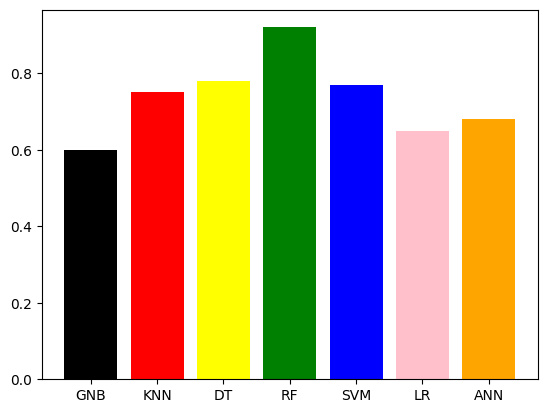

In [29]:
acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["GNB","KNN","DT", "RF", "SVM", "LR","ANN"]
colors = ['black', 'red', 'yellow', 'green', 'blue', 'pink', 'orange']
plt.bar(title, acc_train, color=colors)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

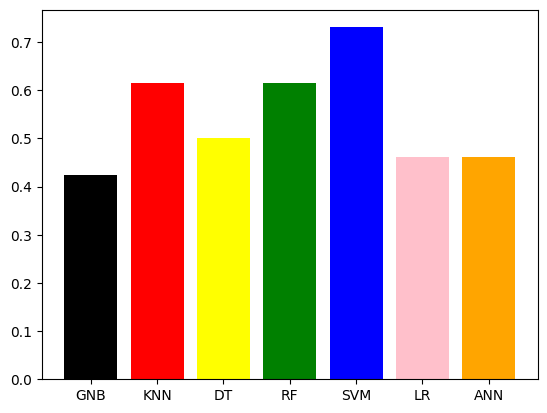

In [30]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ["GNB","KNN","DT", "RF", "SVM", "LR","ANN"]
colors = ['black', 'red', 'yellow', 'green', 'blue', 'pink', 'orange']
plt.bar(title, acc_test, color=colors)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

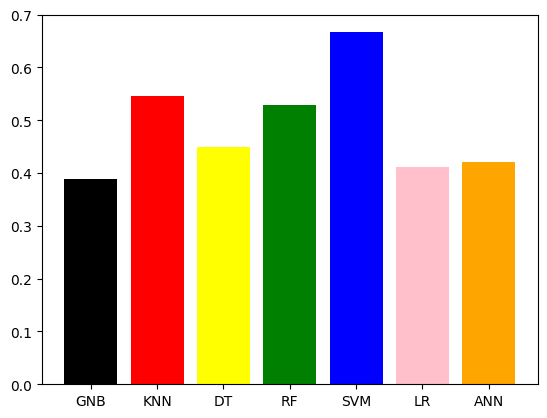

In [31]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ["GNB","KNN","DT", "RF", "SVM", "LR","ANN"]
colors = ['black', 'red', 'yellow', 'green', 'blue', 'pink', 'orange']
plt.bar(title, p, color=colors)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

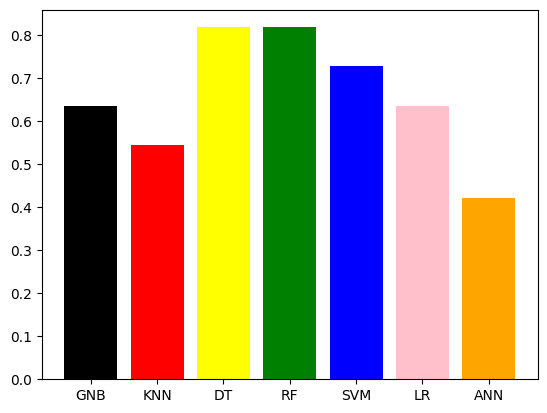

In [32]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, p_ann]
title = ["GNB","KNN","DT", "RF", "SVM", "LR","ANN"]
colors = ['black', 'red', 'yellow', 'green', 'blue', 'pink', 'orange']
plt.bar(title, r, color=colors)
plt.show

feature_importances: [0.20529844 0.17641091 0.16152552 0.14782526 0.15803179 0.15090807]


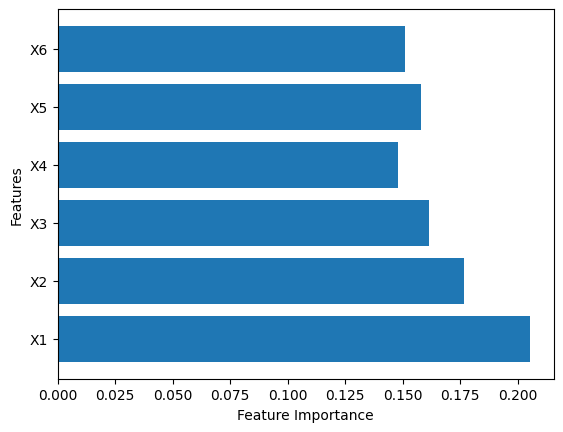

In [33]:
# Get feature importance from the Random Forest model
feature_importances = rf.feature_importances_
print(f"feature_importances: {rf.feature_importances_}")
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel('Features')
plt.show()

## Key Insights
- Customers care most about timely delivery (feature X1) andthe order contents meeting expectations (feature X2). 
- paid a good price (feature X4) has minimal impact and could be removed from the survey.
